#Linear Regression 

In [ ]:
import torch 
import numpy as np 
from torch.optim import SGD
from torch import optim
import matplotlib.pyplot as plt 

In [ ]:
# 데이터 선언 
x_train = torch.FloatTensor(np.arange(3).reshape(3,1))
y_train = torch.FloatTensor([[2],[4],[6]])

w = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = SGD([w,b], lr=0.01)

np_epochs = 1000 
for epoch in range(1, np_epochs +1):
  hypothesis = x_train*w + b 
  cost = torch.mean(torch.abs(hypothesis-y_train))
  # cost = torch.mean((hypothesis - y_train)**2) #loss function -> mse 

  optimizer.zero_grad() #gradient 초기화 
  cost.backward() #gradient 계산 
  optimizer.step() #계산된 gradient르 w,b 개선 

In [ ]:
x_train*w + b 

tensor([[2.0000],
        [4.0000],
        [6.0000]], grad_fn=<AddBackward0>)

#LAB 03 

#간단 Hypothesis function 

H(x) = W*x

- W(weight)와 cost 간의 함수 -> 미분 -> gradient 계산 -> optimizer
- 최소의 cost를 갖는 W를 찾는 것 : Optimizing

In [ ]:
#데이터 
x_train = torch.FloatTensor(np.arange(1,4).reshape(3,1))
y_train = torch.FloatTensor(np.arange(1,4).reshape(3,1))

#모델 초기화
W = torch.zeros(1)
# Learning rate 설정 
lr = 0.1 

np_epochs = 10 
for epoch in range(np_epochs+1):

  # H(x) 계산 
  hypothesis = x_train * W  #H(x) = W*x

  # Cost gradient 계산 
  cost = torch.mean((hypothesis - y_train) **2) #loss function 
  gradient = torch.sum((W*x_train - y_train) * x_train ) #cost function 미분한 것 
  
  print('Epoch {:4d}/{} W: {:.3f}, cost:{:.6f}'.format(epoch, np_epochs,W.item(),cost.item()))

  # cost gradient로 H(x) 개선 
  W -= lr * gradient

Epoch    0/10 W: 0.000, cost:4.666667
Epoch    1/10 W: 1.400, cost:0.746666
Epoch    2/10 W: 0.840, cost:0.119467
Epoch    3/10 W: 1.064, cost:0.019115
Epoch    4/10 W: 0.974, cost:0.003058
Epoch    5/10 W: 1.010, cost:0.000489
Epoch    6/10 W: 0.996, cost:0.000078
Epoch    7/10 W: 1.002, cost:0.000013
Epoch    8/10 W: 0.999, cost:0.000002
Epoch    9/10 W: 1.000, cost:0.000000
Epoch   10/10 W: 1.000, cost:0.000000


In [ ]:
#데이터 
x_train = torch.FloatTensor(np.arange(1,4).reshape(3,1))
y_train = torch.FloatTensor(np.arange(1,4).reshape(3,1))

#모델 초기화
W = torch.zeros(1, requires_grad = True)
# Learning rate 설정 
lr = 0.1 

optimizer = optim.SGD([W],lr=0.15)

np_epochs = 10 
for epoch in range(np_epochs+1):

  # H(x) 계산 
  hypothesis = x_train * W  #H(x) = W*x

  # Cost 계산 
  cost = torch.mean((hypothesis - y_train) **2) #loss function 
  
  print('Epoch {:4d}/{} W: {:.3f}, cost:{:.6f}'.format(epoch, np_epochs,W.item(),cost.item()))

  # cost gradient로 H(x) 개선 
  optimizer.zero_grad() #gradient 초기화 
  cost.backward() #gradient 계산 
  optimizer.step() #graident 적용 

Epoch    0/10 W: 0.000, cost:4.666667
Epoch    1/10 W: 1.400, cost:0.746667
Epoch    2/10 W: 0.840, cost:0.119467
Epoch    3/10 W: 1.064, cost:0.019115
Epoch    4/10 W: 0.974, cost:0.003058
Epoch    5/10 W: 1.010, cost:0.000489
Epoch    6/10 W: 0.996, cost:0.000078
Epoch    7/10 W: 1.002, cost:0.000013
Epoch    8/10 W: 0.999, cost:0.000002
Epoch    9/10 W: 1.000, cost:0.000000
Epoch   10/10 W: 1.000, cost:0.000000


#LAB 04 다변량 선형 회귀 
- 복수의 정보가 있을 때 하나의 값을 예측하기 위한 방법 

Simple Linear Regression 
  - H(x) = Wx + b 

multivate Linear Regression 
  - H(x) = w1x1 + w2x2 + w3x3 .... + b 
  - 입력 변수가 3개면 weight도 3개 
  - 입력 변수 : feature의 갯수 

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
[93, 88, 93],
[89, 91, 90],
[96, 98, 100],
[73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]])

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2544, 80.8363, 79.6489, 86.7360, 61.6571]) Cost: 9299.174805
Epoch    2/20 hypothesis: tensor([104.9088, 126.0952, 124.2429, 135.2979,  96.1780]) Cost: 2916.123535
Epoch    3/20 hypothesis: tensor([125.9906, 151.4351, 149.2102, 162.4868, 115.5059]) Cost: 915.234558
Epoch    4/20 hypothesis: tensor([137.7938, 165.6226, 163.1889, 177.7094, 126.3274]) Cost: 288.017517
Epoch    5/20 hypothesis: tensor([144.4020, 173.5661, 171.0154, 186.2322, 132.3864]) Cost: 91.403984
Epoch    6/20 hypothesis: tensor([148.1017, 178.0136, 175.3972, 191.0040, 135.7788]) Cost: 29.771265
Epoch    7/20 hypothesis: tensor([150.1728, 180.5038, 177.8504, 193.6755, 137.6784]) Cost: 10.450801
Epoch    8/20 hypothesis: tensor([151.3322, 181.8982, 179.2239, 195.1712, 138.7422]) Cost: 4.393949
Epoch    9/20 hypothesis: tensor([151.9812, 182.6790, 179.9928, 196.0086, 139.3379]) Cost: 2.494854
Epoch   10/20 hypo

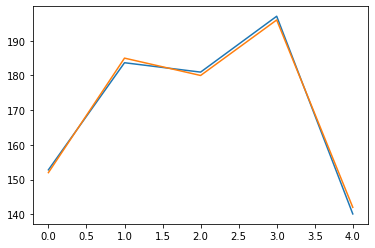

In [ ]:
#모델 초기화 
W = torch.zeros((3,1),requires_grad=True) 
b = torch.zeros(1)
#learning rate 설정 
lr = 1e-5
optimizer = optim.SGD([W,b], lr = lr )

np_epochs = 20
for epoch in range(np_epochs+1):
  hypothesis = x_train.matmul(W) + b 
  
  #cost 계산 
  cost = torch.mean((hypothesis - y_train) **2)

  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(epoch, np_epochs, hypothesis.squeeze().detach(),cost.item()))

  #cost gradient로 H(x) 개선 
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

hypothesis = x_train.matmul(W)+b
plt.plot(hypothesis.detach())
plt.plot(y_train)
plt.show()

# nn.module을 이용한 Linear Regression 

## 모델 선언 

In [ ]:
import torch.nn as nn
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)

  def forward(self, x):
    return self.linear(x)

In [ ]:
import torch.nn.functional as F

#데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

#모델 초기화 
model = MultivariateLinearRegressionModel()

#optimizer 설정 
optimizer = optim.SGD([W,b], lr = 1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
# H(x) 계산
  
  hypothesis = model(x_train)

  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)
  # cost = F.mse_loss(Hypothesis, y_train)
  
  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
  epoch, nb_epochs, hypothesis.squeeze().detach(),
  cost.item()
  ))

Epoch    0/20 hypothesis: tensor([ -93.0559, -110.5593, -109.6966, -118.5116,  -84.7451]) Cost: 76332.523438
Epoch    1/20 hypothesis: tensor([ -93.0559, -110.5593, -109.6966, -118.5116,  -84.7451]) Cost: 76332.523438
Epoch    2/20 hypothesis: tensor([ -93.0559, -110.5593, -109.6966, -118.5116,  -84.7451]) Cost: 76332.523438
Epoch    3/20 hypothesis: tensor([ -93.0559, -110.5593, -109.6966, -118.5116,  -84.7451]) Cost: 76332.523438
Epoch    4/20 hypothesis: tensor([ -93.0559, -110.5593, -109.6966, -118.5116,  -84.7451]) Cost: 76332.523438
Epoch    5/20 hypothesis: tensor([ -93.0559, -110.5593, -109.6966, -118.5116,  -84.7451]) Cost: 76332.523438
Epoch    6/20 hypothesis: tensor([ -93.0559, -110.5593, -109.6966, -118.5116,  -84.7451]) Cost: 76332.523438
Epoch    7/20 hypothesis: tensor([ -93.0559, -110.5593, -109.6966, -118.5116,  -84.7451]) Cost: 76332.523438
Epoch    8/20 hypothesis: tensor([ -93.0559, -110.5593, -109.6966, -118.5116,  -84.7451]) Cost: 76332.523438
Epoch    9/20 hypot

# Lab 04_02 

# Custom Dataset

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class CustomDataset(Dataset):
  def __init__(self):
    # super().__init__()
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]
  def __len__(self):
    return len(self.x_data)
  def __getitem__(self,idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x,y
dataset = CustomDataset()
dataloader = DataLoader(dataset,batch_size=2, shuffle=True)

In [ ]:
import torch.nn as nn
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)
  def forward(self, x):
    return self.linear(x)

In [ ]:
import torch.nn.functional as F

W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

model = MultivariateLinearRegressionModel()
dataset = CustomDataset()
dataloader = DataLoader(dataset,batch_size=2, shuffle=True)
optimizer = optim.SGD([W,b],lr = 1e-5)

nb_epochs = 20 
for epoch in range(nb_epochs +1):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    prediction = x_train.matmul(W) + b 

    cost = F.mse_loss(prediction, y_train)
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))



Epoch    0/20 Batch 1/3 Cost: 21634.000000
Epoch    0/20 Batch 2/3 Cost: 15422.340820
Epoch    0/20 Batch 3/3 Cost: 13.646540
Epoch    1/20 Batch 1/3 Cost: 11777.322266
Epoch    1/20 Batch 2/3 Cost: 31539.878906
Epoch    1/20 Batch 3/3 Cost: 32333.687500
Epoch    2/20 Batch 1/3 Cost: 5090.295410
Epoch    2/20 Batch 2/3 Cost: 2218.885742
Epoch    2/20 Batch 3/3 Cost: 25647.888672
Epoch    3/20 Batch 1/3 Cost: 30453.398438
Epoch    3/20 Batch 2/3 Cost: 17863.687500
Epoch    3/20 Batch 3/3 Cost: 137.734238
Epoch    4/20 Batch 1/3 Cost: 7480.214844
Epoch    4/20 Batch 2/3 Cost: 38746.093750
Epoch    4/20 Batch 3/3 Cost: 42083.289062
Epoch    5/20 Batch 1/3 Cost: 5617.344727
Epoch    5/20 Batch 2/3 Cost: 4697.622070
Epoch    5/20 Batch 3/3 Cost: 46778.253906
Epoch    6/20 Batch 1/3 Cost: 48503.214844
Epoch    6/20 Batch 2/3 Cost: 23786.417969
Epoch    6/20 Batch 3/3 Cost: 6.081700
Epoch    7/20 Batch 1/3 Cost: 27214.566406
Epoch    7/20 Batch 2/3 Cost: 33843.078125
Epoch    7/20 Batch 3/3 C